AUTHOR : NZURUMIKE EMMANUEL CHUKWUDI

    CODSOFT INTERNSHIP
     
     TASK 3
     
     SALES PREDICTION USING PYTHON

# Importing of important lib, loading and cleaning of the dataset

In [1]:
# Important lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
car_purchasing = pd.read_csv('car_purchasing.csv')
car_purchasing.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
car_purchasing.shape

(500, 9)

In [4]:
car_purchasing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
car_purchasing.duplicated().sum()

0

In [6]:
# statistical summary of the dataset
car_purchasing.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [7]:
car_purchasing.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [8]:
car_purchasing['country'].value_counts()

Israel                 6
Mauritania             6
Bolivia                6
Greenland              5
Saint Barth�lemy       5
                      ..
El Salvador            1
Denmark                1
Oman                   1
Trinidad and Tobago    1
marlal                 1
Name: country, Length: 211, dtype: int64

<Axes: xlabel='gender', ylabel='car purchase amount'>

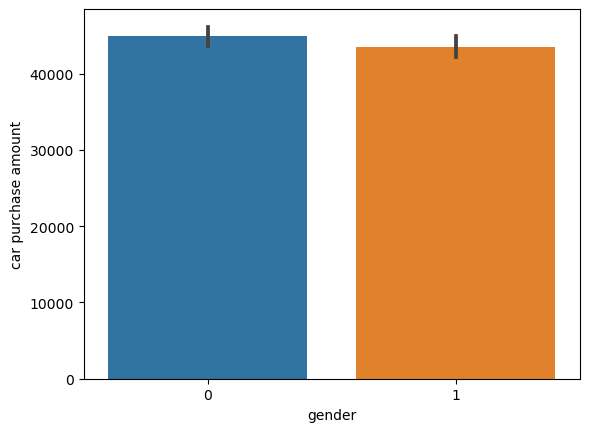

In [9]:
sns.barplot(x='gender',y='car purchase amount',data = car_purchasing)

In [10]:
columns_to_drop = ['customer name','customer e-mail','country']
car_purchasing.drop(columns_to_drop, axis=1, inplace=True)
car_purchasing.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# visulazing of annual salary and car purchase amount

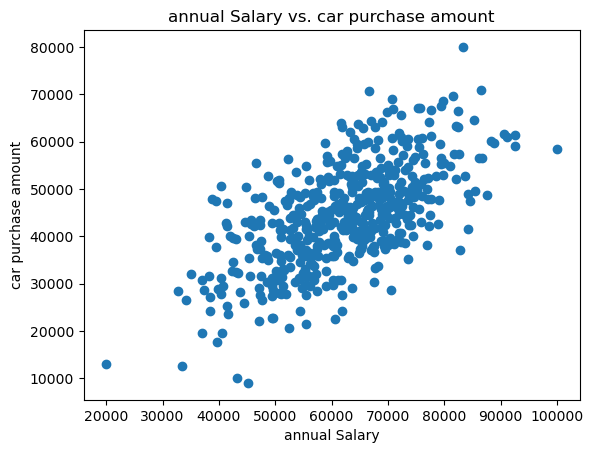

In [11]:
plt.scatter(car_purchasing['annual Salary'], car_purchasing['car purchase amount'])
plt.xlabel('annual Salary')
plt.ylabel('car purchase amount')
plt.title('annual Salary vs. car purchase amount')
plt.show()


# MODEL

In [12]:
from sklearn.model_selection import train_test_split
# Split the data into features (X) and target (y)
X = car_purchasing[['credit card debt', 'annual Salary']]
y = car_purchasing['car purchase amount']


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred

array([50929.81663616, 42335.37656214, 47198.72894762, 40227.76104451,
       45068.440847  , 43863.49905347, 44710.2736146 , 43383.69333543,
       36505.27943118, 46099.9201454 , 39172.21798711, 38534.41904242,
       42102.29446835, 48140.11876037, 43026.1466841 , 53753.81123382,
       49528.83322025, 31398.84544582, 50417.29206739, 52290.05353636,
       44926.71169861, 53229.31351803, 44939.27986389, 39689.21252381,
       37731.13997417, 42074.36923758, 47826.33444287, 45538.72716939,
       36938.77425669, 47395.03812872, 46242.25276762, 49515.05094857,
       41618.38263306, 55039.40257647, 39358.42848294, 40973.19747483,
       49535.78726671, 37384.18623123, 41792.20919983, 39487.99945163,
       51941.17254361, 51794.05605999, 31303.14747434, 47061.81356521,
       47276.37548144, 39155.6763163 , 44418.84125396, 40265.81264683,
       55190.04323893, 45733.68188496, 44762.67147782, 42264.34773419,
       43152.20756685, 47120.70178914, 42460.16675039, 38573.22849465,
      

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 66611367.39747089
R-squared: 0.383074759533359


In [ ]:
 n